# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?

**Bitcoin 0.056650**

2. Which coin had the highest negative score?

**Ethereum 0.372000**

3. Which coin had the highest positive score?

**Bitcoin 0.187000**

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Joanne
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()

api_key = os.getenv("api_key")



In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="bitcoin",  language="en", sort_by="relevancy")

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="ethereum",  language="en", sort_by="relevancy")

In [8]:
# Creating a function to get sentiment score
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [10]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content
0,-0.5574,0.098,0.902,0.000,New York lawmakers have passed a bill\r\n that...
1,0.4404,0.000,0.923,0.077,"Rapper and entrepreneur Shawn Carter, better k..."
2,0.5267,0.000,0.876,0.124,A new study on bitcoin calls into question whe...
3,0.5106,0.000,0.836,0.164,"Image caption, President Faustin-Archange Toua..."
4,-0.1027,0.040,0.960,0.000,You can now reportedly pay for your burritos a...


In [12]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content
0,-0.1027,0.040,0.960,0.000,GameStop has officially thrown itself headlong...
1,0.1280,0.000,0.954,0.046,GameStop is going all-in on crypto. The video ...
2,0.3182,0.000,0.941,0.059,The ability to conduct external transfers on P...
3,0.5859,0.000,0.866,0.134,"A decentralized autonomous organization, or DA..."
4,0.3612,0.044,0.875,0.081,"Crypto Winter It May Be, But Ethereum Looks Li..."


In [13]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.030635,0.059100,0.884300,0.056650
std,0.406566,0.069485,0.090514,0.060573
min,-0.859300,0.000000,0.646000,0.000000
25%,-0.322475,0.000000,0.837500,0.000000
50%,0.000000,0.053000,0.894000,0.043000
75%,0.334100,0.087500,0.948500,0.087750
max,0.526700,0.300000,1.000000,0.187000


In [14]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.017460,0.056200,0.892150,0.051800
std,0.435734,0.087082,0.085361,0.047295
min,-0.948500,0.000000,0.628000,0.000000
25%,-0.396450,0.000000,0.861250,0.000000
50%,0.012900,0.039500,0.909500,0.052500
75%,0.376275,0.088250,0.955000,0.081500
max,0.585900,0.372000,1.000000,0.135000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Bitcoin 0.056650**

Q: Which coin had the highest compound score?

A: **Ethereum 0.585900**

Q. Which coin had the highest positive score?

A: **Bitcoin 0.187000**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()



# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [34]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)

   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    
    # Convert the words to lowercase and Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]

  
    
    
    
 
    
    
    return tokens

In [35]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.5574,0.098,0.902,0.000,New York lawmakers have passed a bill\r\n that...,"[new, york, lawmaker, passed, bill, would, tem..."
1,0.4404,0.000,0.923,0.077,"Rapper and entrepreneur Shawn Carter, better k...","[rapper, entrepreneur, shawn, carter, better, ..."
2,0.5267,0.000,0.876,0.124,A new study on bitcoin calls into question whe...,"[new, study, bitcoin, call, question, whether,..."
3,0.5106,0.000,0.836,0.164,"Image caption, President Faustin-Archange Toua...","[image, caption, president, faustinarchange, t..."
4,-0.1027,0.040,0.960,0.000,You can now reportedly pay for your burritos a...,"[reportedly, pay, burrito, taco, bitcoin, digi..."


In [36]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.1027,0.040,0.960,0.000,GameStop has officially thrown itself headlong...,"[gamestop, officially, thrown, headlong, web3,..."
1,0.1280,0.000,0.954,0.046,GameStop is going all-in on crypto. The video ...,"[gamestop, going, allin, crypto, video, game, ..."
2,0.3182,0.000,0.941,0.059,The ability to conduct external transfers on P...,"[ability, conduct, external, transfer, paypals..."
3,0.5859,0.000,0.866,0.134,"A decentralized autonomous organization, or DA...","[decentralized, autonomous, organization, dao,..."
4,0.3612,0.044,0.875,0.081,"Crypto Winter It May Be, But Ethereum Looks Li...","[crypto, winter, may, ethereum, look, like, bu..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [37]:
from collections import Counter
from nltk import ngrams

In [38]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [39]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [40]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [41]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [42]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [43]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('char', 20),
 ('bitcoin', 14),
 ('new', 8),
 ('blockchain', 6),
 ('cryptocurrency', 6),
 ('digital', 4),
 ('world', 4),
 ('luna', 4),
 ('token', 4),
 ('would', 3)]

In [44]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 20),
 ('cryptocurrency', 8),
 ('ethereum', 5),
 ('new', 4),
 ('crypto', 4),
 ('market', 4),
 ('year', 4),
 ('nft', 4),
 ('web3', 3),
 ('video', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

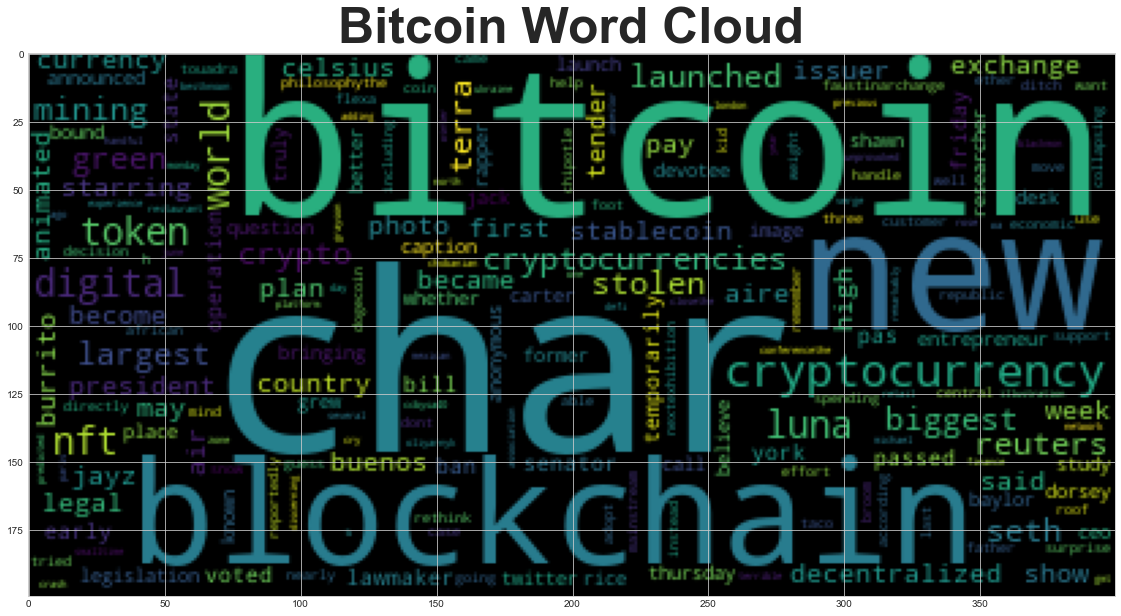

In [47]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

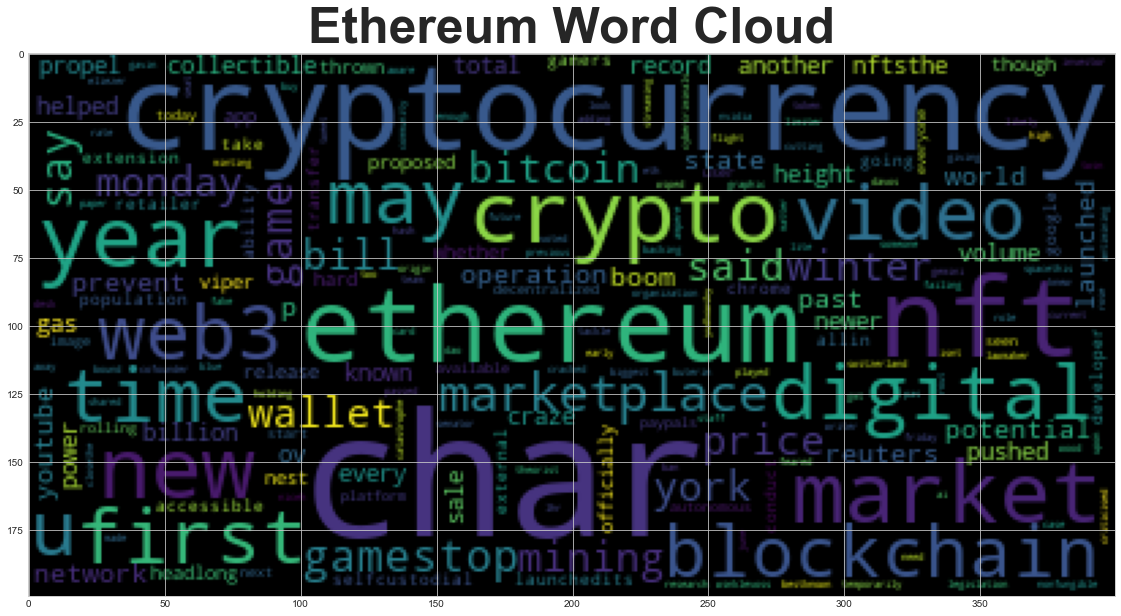

In [48]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [53]:
import spacy
from spacy import displacy

In [54]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [55]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [56]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [57]:
# Run the NER processor on all of the text
doc= nlp(btc_content)
# Add a title to the document
doc.user_data["title"]="Bitcoin NER"

In [58]:
# Render the visualization
displacy.render(doc, style='ent')

In [59]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

New York GPE
Friday DATE
36-27 CARDINAL
Rapper NORP
Shawn Carter PERSON
Jay-Z PERSON
Thursday DATE
Jay-Z PERSON
Jack Dorsey PERSON
Faustin-Archange Touadéra LAW
The Central African Republic's ORG
Bitcoin NORP
first ORDINAL
nearly three feet QUANTITY
The Paris NFT Day EVENT
The Celsius Network PRODUCT
DeFi GPE
] Photo Illustration WORK_OF_ART
Grayson Blackmon PERSON
Oliyarnyk / CC-BY-SA-4.0 ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 PERSON
May 24 DATE
Reuters ORG
its ninth week DATE
two CARDINAL
Seth Green's PERSON
Nike ORG
today DATE
Seth Green's PERSON
NFT ORG
Seth Green's PERSON
NFT ORG
Sam Bankman-Fried PERSON
the digital asset exchange ORG
FTX ORG
Riot Blockchain PERSON
Marathon Digital Holdings ORG
El Salvador GPE
first ORDINAL
September DATE
$36 million MONEY
over 50% PERCENT
Thursday DATE


---

### Ethereum NER

In [60]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [61]:
# Run the NER processor on all of the text
doc= nlp(eth_content)
# Add a title to the document
doc.user_data["title"]="Ethereum NER"

In [62]:
# Render the visualization
displacy.render(doc, style='ent')

In [63]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

GameStop ORG
web3 LOC
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
PayPal ORG
today DATE
U.S. GPE
DAO ORG
two CARDINAL
Blue Origin ORG
first ORDINAL
Gemini ORG
Ethereum (Cryptocurrency ORG
+3614 NORP
New York GPE
Friday DATE
36-27 CARDINAL
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
Nvidia PERSON
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
Buterin PERSON
AI ORG
Eliezer Yudkowsky PERSON
YouTube ORG
Elon Musk PERSON
YouTube ORG
the past few years DATE
NFT ORG
$29 billion MONEY
several years ago DATE
NFT ORG
Kim Kardashian PERSON
Floyd Mayweather PERSON
NBA ORG
Paul Pierce PERSON
Ether PERSON
Solana PERSON
third ORDINAL
10% PERCENT
Wednesday DATE
the past few years DATE
NFT ORG
$29 billion MONEY
6 CARDINAL
6 CARDINAL
New York's GPE
Ukraine GPE
Ethereum ORG
Johnny PERSON
YouTuber ORG
first ORDINAL


---